In [1]:
import numpy as np
import pandas as pd
import json
import gzip
from collections import Counter 

In [2]:
df = pd.read_json('../data/original/DNA_DATA_FULL.gz', compression='gzip') 

<h1><b>Data Profiling</b></h1>

<h2><b>Validity Check for Company-Related Columns</b></h2>

<h3><b>Getting only the columns that deal with the company codes</b></h3>

In [3]:
#Looking only at the company columns
companies = df[['company_codes', 'company_codes_occur', 'company_codes_about', 'company_codes_lineage', 'company_codes_association', 'company_codes_relevance']]

In [43]:
#There are no values in this column so it will not be part of the validating process
print(companies['company_codes_association'].value_counts())
companies = df[['company_codes', 'company_codes_occur', 'company_codes_about', 'company_codes_lineage', 'company_codes_relevance']]

    1942855
Name: company_codes_association, dtype: int64


<h3><b>Creating a profile table for validity</b></h3>

In [91]:
#For validating, I will be taking each unique company code in all of the columns and checking to see if each one is in the company codes dictionary
#The dataframe below will keep track of the % of valid company codes
profile = pd.DataFrame({"Validity": np.zeros(len(companies.columns))}).set_index(companies.columns)

<h3><b>Creating validity function</b></h3>

In [12]:
#Here is the validity function I will be using
#returns the sum of True and divides by the length of the unique list
def checkValidity(ls, col = code_dict.code.tolist()):
    return sum([code in col for code in ls]) / len(ls)

<h3><b>Getting unique codes for each column</b></h3>

In [4]:
#Getting the unique company codes
unique_company_codes = set()
for value in companies['company_codes']:
    unique_company_codes.update(value.split(","))

#Convert set back to list
unique_company_codes = list(unique_company_codes)
unique_company_codes = unique_company_codes[1:] #The first element was '', so I didn't include it in the final list
unique_company_codes = [word.upper() for word in unique_company_codes]
print(unique_company_codes[0:10])
print("There are {} unique company codes".format(len(unique_company_codes)))

['PRSHDG', 'NTLBCS', 'URHCS', 'EXANEL', 'ANTVRL', 'CPZPCQP', 'THRMGT', 'STNFIN', 'SDCWA', 'BRAVR']
There are 73688 unique company codes


In [13]:
#Unique companies from company_codes_occur
unique_companies_occur = set()

for value in df['company_codes_occur']:
    unique_companies_occur.update(value.split(","))

unique_companies_occur = list(unique_companies_occur)
unique_companies_occur = unique_companies_occur[1:]
unique_companies_occur = [word.upper() for word in unique_companies_occur]
print(unique_companies_occur[0:10])
print("There are {} unique companies in unique_companies_occur".format(len(unique_companies_occur))) 

['USACMM', 'SXCHIC', 'HCAHN', 'HATTFN', 'DDEBCI', 'WHREIT', 'UFEDTE', 'NYXGGL', 'ADISIG', 'HKELEC']
There are 62381 unique companies in unique_companies_occur


In [14]:
#unique companies from company_codes_about
unique_companies_about = set()

for value in df['company_codes_about']:
    unique_companies_about.update(value.split(","))

unique_companies_about = list(unique_companies_about)
unique_companies_about = unique_companies_about[1:]
unique_companies_about = [word.upper() for word in unique_companies_about]
print(unique_companies_about[0:10])
print("There are {} unique companies in unique_companies_about".format(len(unique_companies_about)))

['USACMM', 'BRKLC', 'SXCHIC', 'HATTFN', 'WHREIT', 'UFEDTE', 'AMRTSL', 'DHOSPC', 'PANCHN', 'UNGLOC']
There are 30780 unique companies in unique_companies_about


In [42]:
#unique companies from company_codes_relevance
unique_companies_relevance = set()

for value in df['company_codes_relevance']:
    unique_companies_relevance.update(value.split(","))

unique_companies_relevance = list(unique_companies_relevance)
unique_companies_relevance = unique_companies_relevance[1:]
unique_companies_relevance = [word.upper() for word in unique_companies_relevance]
print(unique_companies_relevance[0:10])
print("There are {} unique companies in unique_companies_relevance".format(len(unique_companies_relevance)))


['USACMM', 'SXCHIC', 'HCAHN', 'HATTFN', 'EESYSI', 'CYTVAB', 'WHREIT', 'UFEDTE', 'QMTLCI', 'NYXGGL']
There are 66451 unique companies in unique_companies_relevance


In [16]:
#unique companies from company_codes_lineage
unique_companies_lineage = set()

for value in df['company_codes_lineage']:
    unique_companies_lineage.update(value.split(","))

unique_companies_lineage = list(unique_companies_lineage)
unique_companies_lineage = unique_companies_lineage[1:]

#Convert to uppercase bc data dictionary has all codes in upper case
unique_companies_lineage = [word.upper() for word in unique_companies_lineage]
print(unique_companies_lineage[0:10])
print("There are {} unique companies in unique_companies_lineage".format(len(unique_companies_lineage)))

['MMRRDC', 'TUDB', 'CHINAC', 'MZZNML', 'BARDCR', 'TMMHLP', 'HILIND', 'HEALLC', 'GLBLHC', 'LINPL']
There are 3467 unique companies in unique_companies_lineage


<h3><b>Loading in company code dictionary</b></h3>


In [83]:
#Uploading the data dictionary into a dataframe
code_dict = pd.read_csv("../data/original/companies.csv")

<h3><b>Checking validity for each column and applying the result to the profile table</b></h3>

In [23]:
#print(checkValidity(unique_companies_lineage))
profile.iloc[3] = checkValidity(unique_companies_lineage)

In [17]:
profile.iloc[0] = checkValidity(unique_company_codes)

In [21]:
profile.iloc[2] = checkValidity(unique_companies_about)

In [19]:
profile.iloc[1] = checkValidity(unique_companies_occur)

In [43]:
profile.iloc[4] = checkValidity(unique_companies_relevance)

<h3><b>Company Code Validity Results</b></h3>

In [81]:
profile

,Validity
company_codes,0.868595
company_codes_occur,0.891650
company_codes_about,0.994087
company_codes_lineage,0.993654
company_codes_relevance,0.860634


<h3><b>Getting the invalid company codes</b></h3>

In [21]:
#Getting all the invalid company codes
invalid_company_codes = np.array([])
for co in unique_company_codes:
    if co not in code_dict.code.tolist():
        invalid_company_codes = np.append(invalid_company_codes, co)   

In [22]:
print("There are {} invalid companies".format(len(invalid_company_codes)))

There are 9683 invalid companies


<h3><b>Added a csv to the working folder that has all the invalid company codes from the company codes column</b></h3>

In [23]:
#All the codes that are in the dataset but not in the data dictionary
invalid_df = pd.DataFrame()
invalid_df['code'] = invalid_company_codes

In [24]:
invalid_df.to_csv("../data/working/invalidcompanycodes.csv")

<h3><b>Double checking to make sure that no codes in the invalid_company_codes list are valid (Should get 0% valid)</b></h3>

In [15]:
print(checkValidity(invalid_company_codes))

0.0


<h3><b>Listing some of the invalid codes (aka codes in the dataset but not in the dictionary)</b></h3>

In [14]:
invalid_company_codes[0:30]

array(['KUKXBV', 'AMSFFRA', 'LUNFCI', 'GANCMM', 'INSTLC', 'BZHTAKX',
       'BFLMII', 'LVDTIN', 'DALNGEZ', 'CUCMAL', 'CRPZJHJ', 'AHMUCPH',
       'CADRHL', 'RHALUM', 'AWTRA', 'AKVYHCU', 'ORTHVT', 'KLINGC',
       'KLICO', 'REESSQ', 'WELHGL', 'MOCENU', 'APPUDYG', 'COJZCJA',
       'CSUFFR', 'OCOUHD', 'GNTXUI', 'NOVPLL', 'NIKOUI', 'PITTOI'],
      dtype='<U32')

In [26]:
df['Row'] = np.arange(0, len(df)) 

<h3><b>Filtering through the dataset and keeping track of rows with at least one invalid company in them</b></h3>

In [56]:
invalid_row = []
for row in df.itertuples():
    for code in row.company_codes.split(","):
        if code.upper() in invalid_company_codes:
            invalid_row.append(row.Row)

invalid_row = set(invalid_row)

In [58]:
invalid_row = list(invalid_row)

[1048577,
 1572865,
 1572866,
 1048580,
 524293,
 524294,
 1572870,
 524296,
 1572876,
 1048590,
 17,
 19,
 1048598,
 1048600,
 1048601,
 1048603,
 524317,
 1048608,
 1048609,
 35]

In [60]:
invalid_row.sort()

In [61]:
print("There are {} rows with at least one invalid company code in the company_codes column, which is about {}% of the entire dataset".format(len(invalid_row),  len(invalid_row) / len(df) * 100))

There are 161321 rows with at least one invalid company code in the company_codes column, which is about 8.303295922752856% of the entire dataset


In [62]:
#First 100 invalid rows
print(invalid_row[0:100])

[17, 19, 35, 38, 59, 67, 68, 70, 72, 94, 108, 121, 134, 139, 146, 159, 161, 164, 184, 201, 203, 211, 251, 255, 263, 277, 283, 316, 322, 331, 341, 347, 379, 390, 412, 428, 434, 439, 458, 460, 462, 464, 509, 519, 532, 538, 547, 560, 577, 612, 613, 629, 639, 645, 653, 677, 695, 703, 714, 735, 746, 761, 770, 780, 831, 832, 872, 878, 884, 890, 906, 921, 923, 939, 945, 951, 954, 956, 964, 993, 1015, 1046, 1052, 1056, 1062, 1067, 1071, 1072, 1075, 1077, 1078, 1082, 1087, 1129, 1158, 1159, 1163, 1172, 1188, 1212]


<h2><b>Completeness, Uniqueness, and Duplicates</b></h2>

In [90]:
#create profiling dataframe
prof = pd.DataFrame({"Completeness": np.zeros(len(df.columns)).astype(int), "Uniqueness": np.zeros(len(df.columns)).astype(int),"Duplicates": np.zeros(len(df.columns)).astype(int)}).set_index(df.columns)

<h3><b>Functions for Completeness, Uniqueness, and Duplicates</b><h3>

In [193]:
def findCompleteness(col):
    return sum(~col.isnull()) / len(col)

#NaN not counted as unique
def isUnique(col):
    return (len(col.unique()) - sum(col.isnull().unique())) / (len(col) - sum(col.isnull()))

def checkDuplicates(col):
    return sum(col.duplicated()) / len(col)

<h3><b>Applying each function</b></h3>

In [194]:
#Applying completeness to a df
prof['Completeness'] = df.apply(findCompleteness)

#Applying the unique function
prof['Uniqueness'] = df.apply(isUnique)

#Applying the duplicate function
prof['Duplicates'] = df.apply(checkDuplicates)

<h3><b>Profile</b></h3>

In [211]:
prof.drop('Row', inplace = True)
prof

,Completeness,Uniqueness,Duplicates
copyright,1.000000,7.014934e-03,0.992985
subject_codes,1.000000,1.732466e-01,0.826753
art,1.000000,1.040685e-02,0.989593
modification_datetime,1.000000,6.468182e-01,0.353182
body,0.975772,8.207384e-01,0.199146
company_codes_occur,1.000000,1.813707e-01,0.818629
company_codes_about,1.000000,9.813290e-02,0.901867
company_codes_lineage,1.000000,4.418755e-03,0.995581
snippet,0.988084,9.037721e-01,0.106997
publication_date,1.000000,2.116277e-01,0.788372


<h3><b>Put all the invalid company codes into a dataframe</b><h3>

In [8]:
invalid_df = pd.read_csv("../data/working/invalidcompanycodes.csv", index_col = [0])

<h3><b>Creating a valid company code dictionary</b></h3>

In [39]:
invalid_company_codes = invalid_df.code.tolist()

In [48]:
code_dict.rename(columns = {' description': 'description'}, inplace = True)

In [51]:
valid_companies = pd.DataFrame()
valid_codes = np.array([])
valid_desc = np.array([])

In [52]:
for row in code_dict.itertuples():
    if row.code in unique_company_codes:
        valid_codes = np.append(valid_codes, row.code)
        valid_desc = np.append(valid_desc, row.description)

In [53]:
valid_companies['Code'] = valid_codes
valid_companies['Description'] = valid_desc

In [70]:
valid_companies.drop_duplicates(inplace = True)

In [73]:
valid_companies.to_csv("../data/working/validcompaniesdictionary.csv")

In [81]:
my_valid_df = pd.read_csv("../data/working/validcompaniesdictionary.csv", index_col = [0])

In [82]:
my_valid_df.head()

,Code,Description
0,AA,AA PLC
2,AAAADJ,"Emperial Americas, Inc."
3,AAAAIY,"American Academy of Allergy, Asthma and Immuno..."
5,AAABBB,Bird Studies Canada
6,AAACK,Aesculap AG & Co. KG


<h1><b>Conclusions</b></h1>

<h4>Validity: Defined here as codes that are not in the data dictionary</h4>
<p>Looking at the validity of the company columns</p>
<ol>
    <li>Company_codes had just under 87% valid codes in its column. That means that of all the unique codes in this
        column, 13% or so were not in the data dictionary</li>
    <li>Company_codes_occur was 89% valid for all unique codes in its column</li>
    <li>Both company_codes_about and company_codes_lineage were 99% valid</li>
    <li>Company_codes_relevance was 86% valid</li>
</ol>

<p>There were 73,688 unique company codes in this dataset. Of those 73,688, 9683 were considered invalid since they did not appear in the data dictionary. This left 64,005 valid companies. Each company's code and name are provided in the validcompaniesdictionary.csv. A list of the invalid company codes are also available in the invalidcompanycodes.csv</p>

<p>There were 161,321 rows in the DNA dataset that had at least one invalid company code in its company_codes column</p>

<h4>Completeness, Uniqueness, and Duplicates</h4>


,Completeness,Uniqueness,Duplicates
copyright,1.000000,7.014934e-03,0.992985
subject_codes,1.000000,1.732466e-01,0.826753
art,1.000000,1.040685e-02,0.989593
modification_datetime,1.000000,6.468182e-01,0.353182
body,0.975772,8.207384e-01,0.199146
company_codes_occur,1.000000,1.813707e-01,0.818629
company_codes_about,1.000000,9.813290e-02,0.901867
company_codes_lineage,1.000000,4.418755e-03,0.995581
snippet,0.988084,9.037721e-01,0.106997
publication_date,1.000000,2.116277e-01,0.788372


<h3><b>Frequency of Company Codes</b></h3>

In [3]:
df['Non-duplicates'] = [set(code) for code in df['company_codes'].str.split(",")]

In [4]:
df['Non-duplicates'] = [list(code) for code in df['Non-duplicates']]

In [5]:
df['Non-duplicates'] = [','.join(code) for code in df['Non-duplicates']]

In [6]:
df['Non-duplicates'] = df['Non-duplicates'].str[1:]

In [7]:
x = df[['company_codes', 'Non-duplicates']]

In [35]:
my_list = []
for code in x['company_codes'].str.split(","):
    for code2 in code:
        my_list.append(code2)

In [133]:
company_freq = pd.DataFrame()
company_code = np.array([])
company_count = np.array([])

In [134]:
for company, count in Counter(my_list).items():
    company_code = np.append(company_code, company)
    company_count = np.append(company_count, count)

In [135]:
company_freq['Code'] = company_code
company_freq['Count'] = company_count

In [68]:
company_freq = company_freq.sort_values("Count", ascending = False).iloc[1:]

In [73]:
company_freq.set_index("Code", inplace = True)

Text(0.5, 1.0, 'Top 15 Most Mentioned Companines')

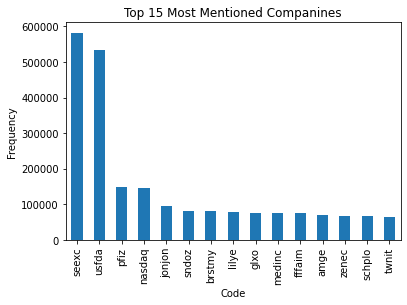

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
company_freq.Count.head(15).plot(kind = 'bar')
plt.ylabel("Frequency")
plt.title("Top 15 Most Mentioned Companines")

<h4><b>Made a csv of all companies with their frequency counts</b></h4>

In [82]:
company_freq.to_csv("../data/working/companyfrequency.csv")

In [86]:
company_freq.reset_index(inplace = True)

<h4><b>Made a csv of all companies with their frequency counts and corresponding company names(invalid companies will have NaN)</b></h4>

In [101]:
name = np.array([])
val = pd.read_csv("../data/working/validcompaniesdictionary.csv", index_col = [0])

In [102]:
val

,Code,Description
0,AA,AA PLC
2,AAAADJ,"Emperial Americas, Inc."
3,AAAAIY,"American Academy of Allergy, Asthma and Immuno..."
5,AAABBB,Bird Studies Canada
6,AAACK,Aesculap AG & Co. KG
...,...,...
105833,ZZZBRL,Boost Brent Oil 3x Leverage Daily ETP
105834,ZZZBRS,Boost Brent Oil 3x Short Daily ETP
105835,ZZZJHB,Nuveen High Income November 2021 Target Term Fund
105836,ZZZSHE,SPDR SSGA Gender Diversity Index ETF


In [103]:
company_freq

,Code,Count
0,seexc,581929.0
1,usfda,532663.0
2,pfiz,147905.0
3,nasdaq,146605.0
4,jonjon,94539.0
...,...,...
73683,detsoi,1.0
73684,ildcms,1.0
73685,oenell,1.0
73686,kretii,1.0


In [107]:
#Convert all codes to uppercase before merging
company_freq['Code'] = company_freq['Code'].str.upper()

In [111]:
#Merging the valid company codes df with the company_freq df. This will match each company with their name, unless invalid
merged_df = pd.merge(val, company_freq, left_on = "Code", right_on = "Code", how = "outer")

In [112]:
merged_df

,Code,Description,Count
0,AA,AA PLC,7.0
1,AAAADJ,"Emperial Americas, Inc.",8.0
2,AAAAIY,"American Academy of Allergy, Asthma and Immuno...",1262.0
3,AAABBB,Bird Studies Canada,1.0
4,AAACK,Aesculap AG & Co. KG,600.0
...,...,...,...
73683,COFWVKZ,NaN,1.0
73684,PCHNY,NaN,1.0
73685,ARMSPI,NaN,1.0
73686,TEASBR,NaN,1.0


In [113]:
merged_df.to_csv("../data/working/companyfrequencyandname.csv")

In [114]:
final = pd.read_csv("../data/working/companyfrequencyandname.csv", index_col = [0])
final.head(20)

,Code,Description,Count
0,AA,AA PLC,7.0
1,AAAADJ,"Emperial Americas, Inc.",8.0
2,AAAAIY,"American Academy of Allergy, Asthma and Immuno...",1262.0
3,AAABBB,Bird Studies Canada,1.0
4,AAACK,Aesculap AG & Co. KG,600.0
5,AAACT,AAA Cooper Transportation,2.0
6,AAAEMG,ARA Asset Management Limited,2.0
7,AAAFES,Army and Air Force Exchange Service,4.0
8,AAAFTS,AAA Foundation for Traffic Safety,5.0
9,AAAHC,Accreditation Association for Ambulatory Healt...,50.0


In [136]:
final[final.Code == 'PFIZ']

,Code,Description,Count
44602,PFIZ,Pfizer Inc,147905.0
